In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_returns(file):
    """Reads data file from the disk and returns percentage change"""
    return pd.read_csv(file + '.csv', index_col=0, parse_dates=True).pct_change()

def get_data(file):
    """Fetch data from the disk"""
    data = pd.read_csv(file + '.csv', index_col='Date', parse_dates=['Date'])
    return data

def calc_corr(ser1, ser2, window):
    """Calculates correlation of two series"""
    ret1 = ser1.pct_change()
    ret2 = ser2.pct_change()
    corr = ret1.rolling(window).corr(ret2)
    return corr

In [3]:
df = get_returns('sp500')

In [4]:
df['NDX'] = get_returns('NDX')

In [5]:
df.tail()

,SP500,NDX
Date,,
2018-07-27,-0.006562,-0.014048
2018-07-30,-0.005754,-0.014209
2018-07-31,0.004885,0.005405
2018-08-01,-0.001040,0.005656
2018-08-02,0.004926,0.013648


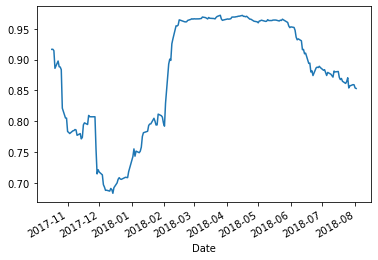

In [6]:
df['SP500'].rolling(50).corr(df['NDX'])[-200:].plot();

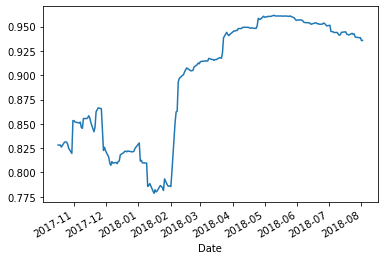

In [7]:
df['SP500'].rolling(100).corr(df['NDX'])[-200:].plot();

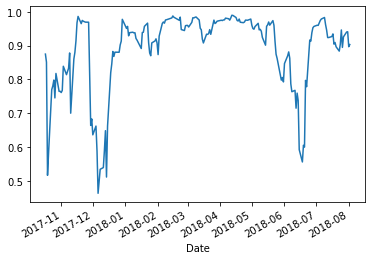

In [8]:
df['SP500'].rolling(10).corr(df['NDX'])[-200:].plot();

In [10]:
points_to_plot = 300

data = get_data('indexes')

In [13]:
for ind in data:
    data[ind + '_rebased'] = (data[-points_to_plot:][ind].pct_change() + 1).cumprod()

In [16]:
data.tail()

,SP500,NDX,SP500_rebased,NDX_rebased
Date,,,,
2018-07-27,2818.82,7296.781,1.167179,1.262774
2018-07-30,2802.60,7193.103,1.160463,1.244832
2018-07-31,2816.29,7231.983,1.166132,1.251560
2018-08-01,2813.36,7272.887,1.164919,1.258639
2018-08-02,2827.22,7372.148,1.170658,1.275817


In [17]:
# Relative strength NDX to SP500
data['RSI'] = data['NDX'] / data['SP500']

# Calculate 50 day rolling correlation
data['corr'] = calc_corr(data['NDX'], data['SP500'], 50)

In [18]:
data.tail(20)

,SP500,NDX,SP500_rebased,NDX_rebased,RSI,corr
Date,,,,,,
2018-07-06,2759.82,7207.334,1.142749,1.247294,2.611523,0.879077
2018-07-09,2784.17,7276.001,1.152832,1.259178,2.613347,0.876194
2018-07-10,2793.84,7282.599,1.156836,1.260320,2.606663,0.873712
2018-07-11,2774.02,7243.980,1.148629,1.253636,2.611365,0.871481
2018-07-12,2798.29,7366.250,1.158679,1.274796,2.632411,0.881285
2018-07-13,2801.31,7375.817,1.159929,1.276452,2.632988,0.879910
2018-07-16,2798.43,7357.899,1.158737,1.273351,2.629295,0.880601
2018-07-17,2809.55,7403.891,1.163341,1.281310,2.635259,0.871020
2018-07-18,2815.62,7390.126,1.165854,1.278928,2.624689,0.867472


In [19]:
# Slice the data - cut the points we don't intend to plot
plot_data = data[-points_to_plot :]

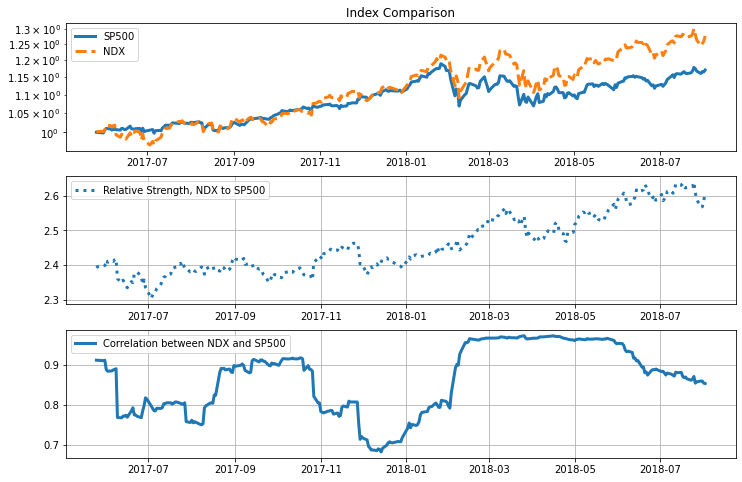

In [28]:
fig = plt.figure(figsize=(12,8))

# The first sublot, planning for 3 plots high, 1 plot wide, this being the first
ax = fig.add_subplot(311)
ax.set_title('Index Comparison')
ax.semilogy(plot_data['SP500_rebased'], linestyle='-', label='SP500', linewidth=3)
ax.semilogy(plot_data['NDX_rebased'], linestyle='--', label='NDX', linewidth=3)
ax.legend()
ax.grid(False);

# Second sub plot
ax2 = fig.add_subplot(312)
ax2.plot(plot_data['RSI'], label='Relative Strength, NDX to SP500', linestyle=':', linewidth=3)
ax2.legend()
ax2.grid(True)

#Thrird sub plot
ax3 = fig.add_subplot(313)
ax3.plot(plot_data['corr'], label='Correlation between NDX and SP500', linestyle='-', linewidth=3)
ax3.legend()
ax3.grid(True)